----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<h1><center>
    
Practical exam on Computer Vision
 
( November, 6th, 2023 )
</center></h1>    

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


This is the practical exam that should be developed during 2 hours. Note that to approve the exam, both parts (theoretical and practical ones) should be approved. Each exercise is defined with the corresponding score. 

## Exercise 1

### Instagram filter

Carles and Anna went to a bussiness trip and took many photos. Sadly, the camera they were using was defective and the images got noise. They want to show their friends a nice photo they took though instagram, but do not know how to improve the quality.

### Ex.1) (1 point) Load the image `men_and_woman_noise.jpg`. Process the image applying a filter to smooth the image and then, after smoothing the image, convert it to gray. Finally, save the result as `men_and_woman_gray.jpg` and plot the three images (the original, the smoothed picture and the gray picture). Set the corresponding titles of the images and their descriptions, containing the shape, dtype, max and min values.

![img](images/men_and_woman_noise.jpg)

C:\Users\UB\anaconda3\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


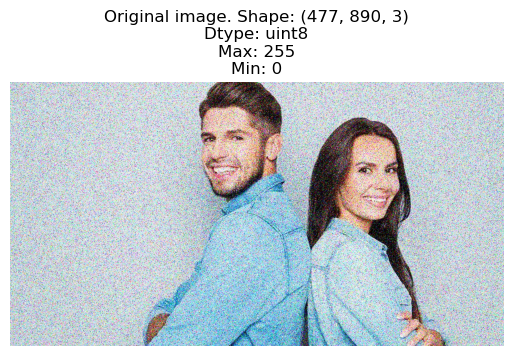

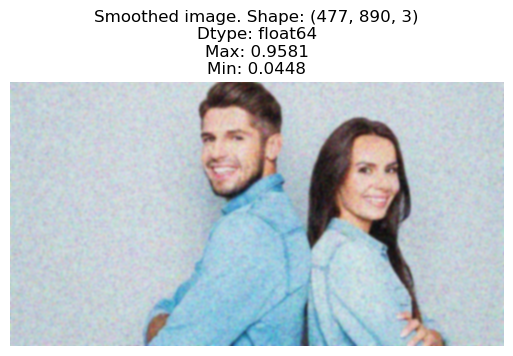

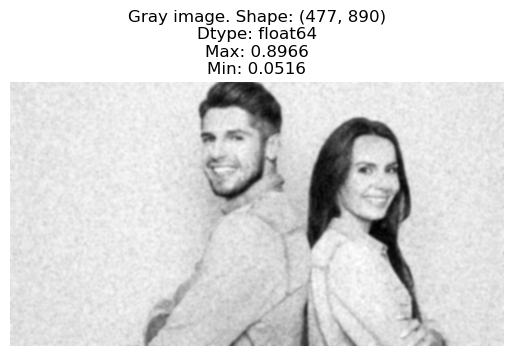

In [90]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, util, color
from skimage.filters import gaussian
from skimage.color import rgb2gray

# Filter out the low-contrast warning
warnings.filterwarnings("ignore", category=UserWarning)

sigma = 2#Use a value of sigma that fixes the noise but still allows the photo to be published 

#your solution
fig = plt.figure(figsize=(14,18))

# Read image
men_and_woman_noise = io.imread('images/men_and_woman_noise.jpg')

# We have a RGB image
# Let's apply a Gaussian Filter to smooth the image
men_and_woman = gaussian(men_and_woman_noise,sigma)

# Let's convert it to gray
men_and_woman_gray = rgb2gray(men_and_woman)

# We save the image in the desired location
io.imsave('images/men_and_woman_gray.jpg',men_and_woman_gray)

fig.add_subplot(2,2,1)
plt.title(f"Original image. Shape: {men_and_woman_noise.shape}\nDtype: {men_and_woman_noise.dtype}\nMax: {round(men_and_woman_noise.max(),4)}\nMin: {round(men_and_woman_noise.min(),4)}")
plt.axis('off')
plt.imshow(men_and_woman_noise)

fig = plt.figure(figsize=(14,18))
fig.add_subplot(2,2,1)
plt.title(f"Smoothed image. Shape: {men_and_woman.shape}\nDtype: {men_and_woman.dtype}\nMax: {round(men_and_woman.max(),4)}\nMin: {round(men_and_woman.min(),4)}")
plt.axis('off')
plt.imshow(men_and_woman)

fig = plt.figure(figsize=(14,18))
fig.add_subplot(2,2,1)
plt.title(f"Gray image. Shape: {men_and_woman_gray.shape}\nDtype: {men_and_woman_gray.dtype}\nMax: {round(men_and_woman_gray.max(),4)}\nMin: {round(men_and_woman_gray.min(),4)}")
plt.axis('off')
plt.imshow(men_and_woman_gray,cmap='gray')


In [81]:
plt??

## Exercise 2

### Sunrise at the beach

Marc has been working all day, gazing out of the window at the beautiful day outside. When he finished, he decided to go to the beach, even though it was late. This is frustrating because he wanted to sunbathe to get a bit tanner.

### Ex.2.1) (2 points) Help Marc get tanner. Load the image `guy_in_swimsuit.jpg` from the folder `images`. Blend the original colors of the image with a more pronounced red aspect by adding to it the RGB colors: (161,61,45). Do this only on Marc (do not apply this to the white areas surrounding Marc). Also make sure that marc tanned image is resized to the `sunrise.jpg` image dimensions as you will need it for the next exercise. 

**Hint:** To blend the image and the rgb colors provided, you can mathematically add them with same weights and making sure the result does not go beyond the right range.

Your output should look as follows: 

![img](images/marcnottanned_marctanned.jpg)

uint8


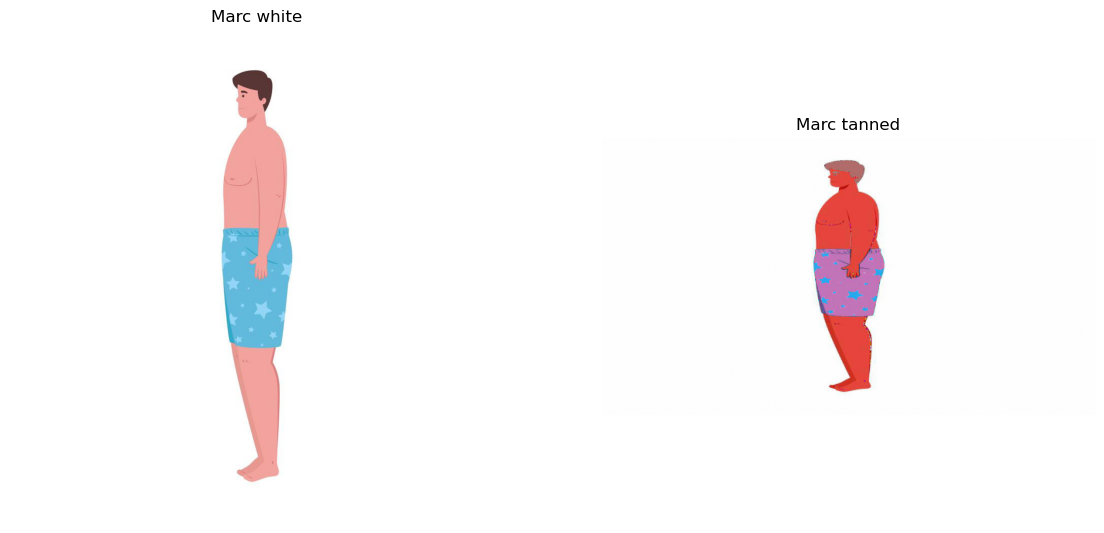

In [126]:
from skimage.transform import resize
from skimage import exposure
#your solution
marc = io.imread('images/guy_in_swimsuit.jpg')
print(marc.dtype)
# We have to blend the image
marc_tanned = marc.copy()
marc_tanned[:,:,0] += marc[:,:,0] + 161 // 255
marc_tanned[:,:,1] += marc[:,:,1] + 61 // 255
marc_tanned[:,:,2] += marc[:,:,2] + 45 // 255


# Let's resize Marc
sunrise = io.imread('images/sunrise.jpg')
sunrise_dim = sunrise.shape[0:2]

fig = plt.figure(figsize=(14,18))
fig.add_subplot(2,2,1)

plt.title("Marc white")
plt.axis('off')
plt.imshow(marc)

fig.add_subplot(2,2,2)

marc_resized = resize(marc_tanned,sunrise_dim)
plt.title("Marc tanned")
plt.axis('off')
plt.imshow(marc_resized)


### Ex.2.2) (1.5 point) Take Marc to the beach: 

Overlap the image of Marc tanned to the image of the sunrise (`sunrise.jpg`). Display the 3 following images:

![img](images/marc_tanned_in_the_beach_2_2.jpg)

**Hint:** Instead of the white area surrounding Marc, you can substitute that for the sunrise correspondent pixels, as the images are of the same size. 

In [ ]:
#your solution

## Exercise 3

### A day in the garden

Bees are essential pollinators in the ecosystem and play a crucial role in the reproduction of many plant species. However, their visual acuity for details, such as small objects or fine details, is not as good as that of humans. In this exercise we will guide them to the flowers within the garden, facilitating their pollination efforts.

### Ex.3.1) (1.5 point) Load the image `yellow_flower.jpeg` and show the edges of the image using the Prewitt, Sobel and Canny methods.

![img](images/yellow_flower.jpeg)

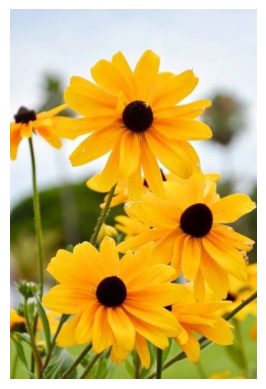

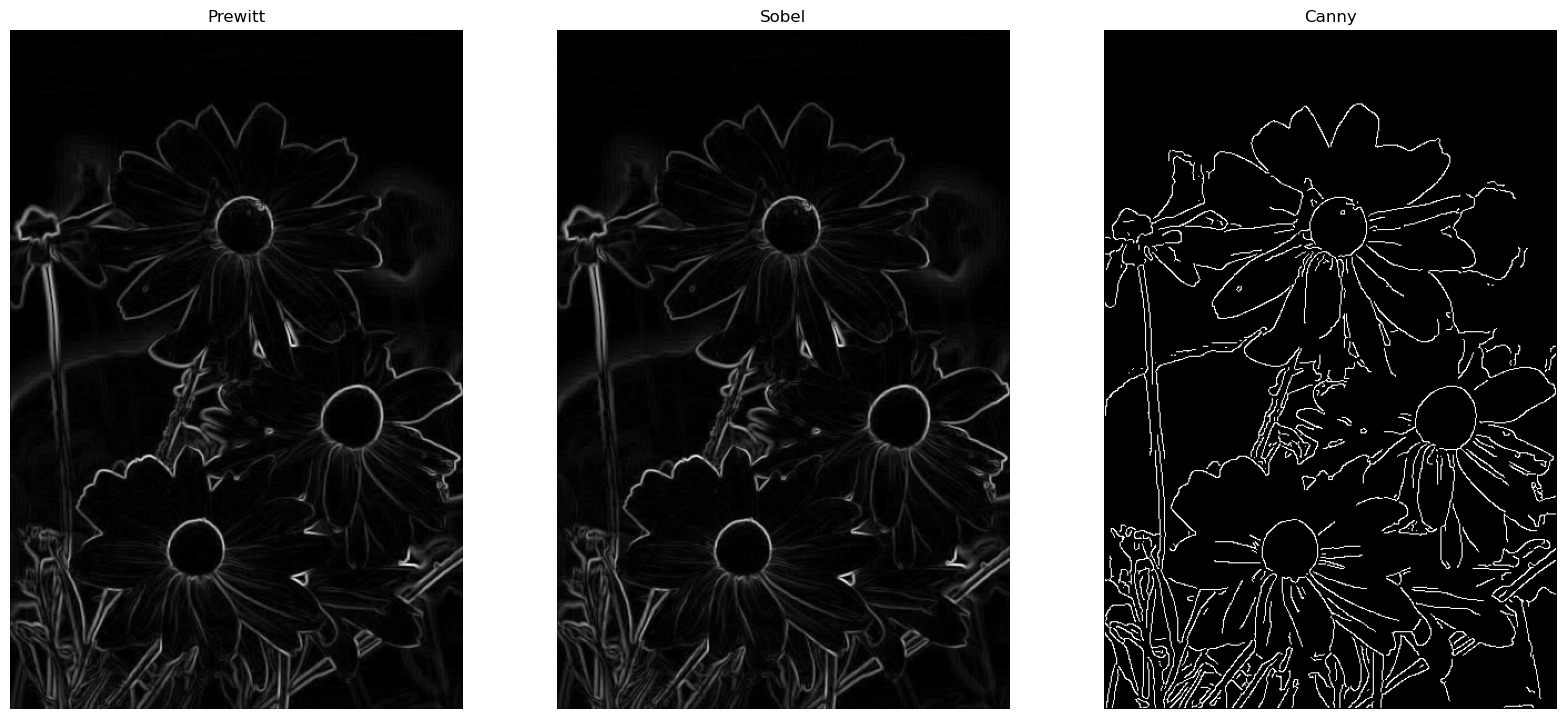

In [62]:
from skimage.color import rgb2gray, rgba2rgb 
from skimage import filters, feature

from skimage.filters import prewitt, sobel    # Edge detection
from skimage.feature import canny             # Edge detection
from skimage.color import rgb2gray, rgba2rgb  # RGB and gray images
from skimage.color import rgba2rgb   # Needed to transform the images to RGB

#your solution
flowers = io.imread('images/yellow_flower.jpeg')
plt.axis('off')


plt.imshow(flowers)

flowers_gray = rgb2gray(flowers)

# Let's compute and show the edges
# Prewitt
flowers_prewitt_edges = prewitt(flowers_gray)


# Sobel
flowers_sobel_edges = sobel(flowers_gray)


# Canny
flowers_canny_edges = canny(flowers_gray)


# Let's show the images
fig = plt.figure(figsize=(20,30))

fig.add_subplot(3,3,1)
plt.title("Prewitt")
plt.axis('off')
plt.imshow(flowers_prewitt_edges,cmap='gray')

fig.add_subplot(3,3,2)
plt.title("Sobel")
plt.axis('off')
plt.imshow(flowers_sobel_edges,cmap='gray')

fig.add_subplot(3,3,3)
plt.title("Canny")
plt.axis('off')
plt.imshow(flowers_canny_edges,cmap='gray')


### Ex.3.2) (1 point) Help the bees in the garden to localize the flowers so they can polinize them: 

Overlap the contours obtained using the previous methods over the image. Display them in a grid of 1x3: 

![img](images/edges_flower.jpg)

**Hint:** Prewitt and Sobel need to be binarized. You can use a threshold of 0.1 for this. 

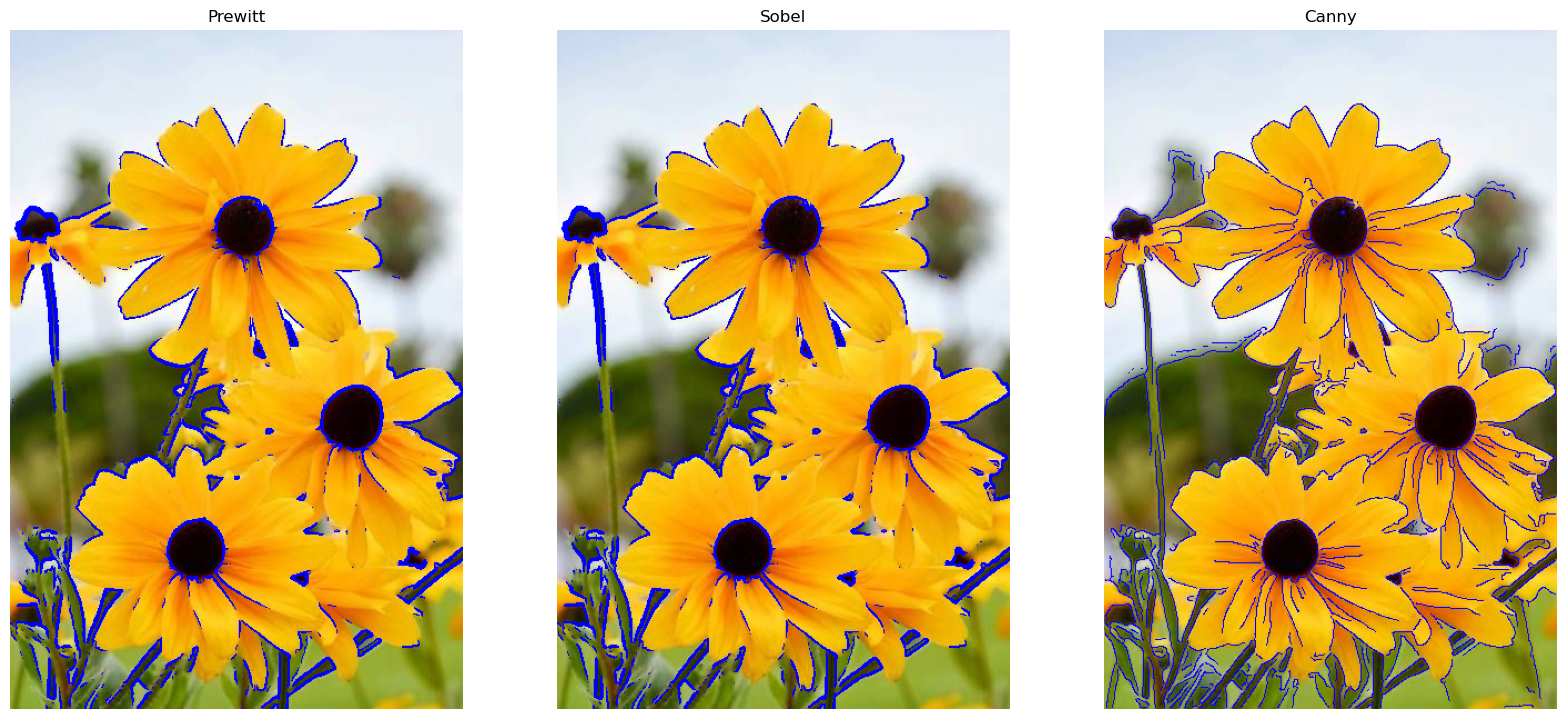

In [63]:
#your solution
# Let's overlap the contours
# We have to binarize it
# Prewitt
flowers_prewitt = flowers.copy()
flowers_prewitt_edge_bin = (flowers_prewitt_edges > 0.1)
flowers_prewitt[flowers_prewitt_edge_bin] = [0, 0, 255]


# Sobel
flowers_sobel = flowers.copy()
flowers_sobel_edge_bin = (flowers_sobel_edges > 0.1)
flowers_sobel[flowers_sobel_edge_bin] = [0, 0, 255]


# Canny
flowers_canny = flowers.copy()
flowers_canny[flowers_canny_edges] = [0, 0, 255]

# Let's show the images
fig = plt.figure(figsize=(20,30))

fig.add_subplot(3,3,1)
plt.title("Prewitt")
plt.axis('off')
plt.imshow(flowers_prewitt)

fig.add_subplot(3,3,2)
plt.title("Sobel")
plt.axis('off')
plt.imshow(flowers_sobel)

fig.add_subplot(3,3,3)
plt.title("Canny")
plt.axis('off')
plt.imshow(flowers_canny)

### Ex.3.3) (1.5 point) Use felzenszwalb segmentation function to detect the edges of the of the image `blue_flower.jpg`: 

Which set of parameters is better for felzenszwalb?:

* n_scales=100, sigma=0.2, min_size=100
* n_scales=300, sigma=0.5, min_size=100
* n_scales=500, sigma=1, min_size=100

Visualize the original image and the result of applying every set of parameters. Comment the effect of every parameter. Do you think the segmentation could be improved? Which parameter would you change?

**With the first set of parameters we can see an over-segmentation, mostly due the low value of sigma. Increasing the n_scales and the sigme we can get a much more accurate segementation and the function does not get that many problems with the backgroud. Finally for the last set of parameters, we could say they produce the least "millimetric" segmentation, but overall they get a good precision with the foreground, ignoring the background.**

**The segmentation definelty could be improved by playing with the min_size parameter, maybe trying bigger ones to make sure it does not take the small segments inside the flower for example.**

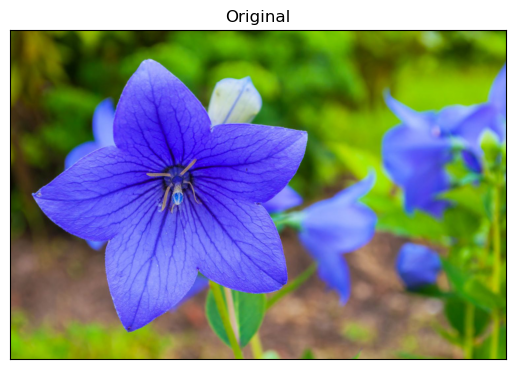

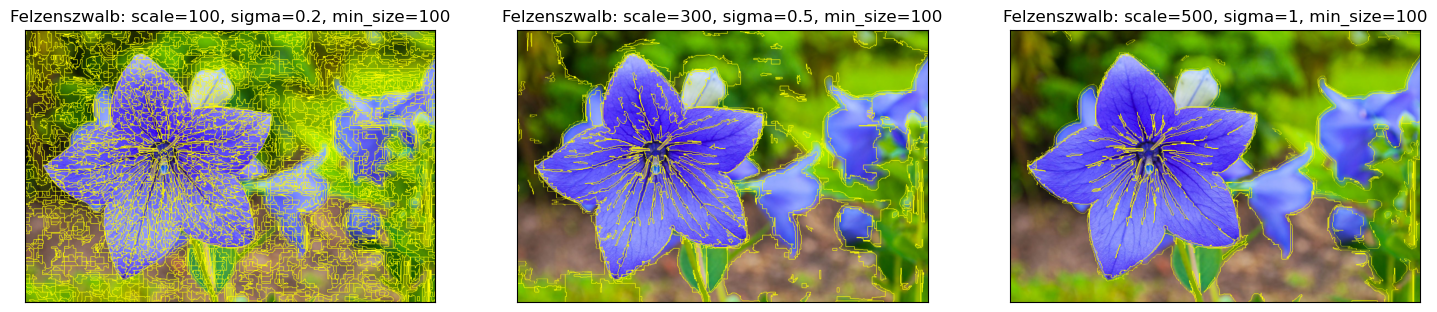

In [94]:
from skimage.segmentation import felzenszwalb, mark_boundaries
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.util import img_as_float

#your solution
img = io.imread('images/blue_flower.jpg')
blue_flower = img_as_float(img)
plt.title("Original")
plt.imshow(blue_flower) 
plt.xticks([])
plt.yticks([])


def felzenswalb_parameters(parameters,img):
    results = []
    for scale_value, sigma_value, min_size_value in parameters:
        temp = felzenszwalb(img, scale=scale_value, sigma=sigma_value, min_size=min_size_value)
        results.append((temp,len(np.unique(temp)),f"Felzenszwalb: scale={scale_value}, sigma={sigma_value}, min_size={min_size_value}"))
    return results

def plot_results(results):
    fig=plt.figure(figsize=(18,10))
    for i in range(len(results)):
        fig.add_subplot(1,len(results),i+1)
        plt.title(results[i][2])
        plt.imshow(mark_boundaries(blue_flower,results[i][0])) 
        plt.xticks([])
        plt.yticks([])

plot_results(felzenswalb_parameters([(100,0.2,100),(300,0.5,100),(500,1,100)],blue_flower))



### Ex.3.4) (1.5 point) Use the SLIC segmentation function to detect the boundaries of the image `blue_flower.jpg`: 

Which set of parameters is better for slic?:

* n_segments=50, compactness=10, sigma=5
* n_segments=200, compactness=10,sigma=1
* n_segments=500, compactness=10,sigma=3

Visualize the original image and the result of applying every set of parameters. Comment the effect of every parameter. Do you think the segmentation could be improved? Which parameter would you change?

**In the first set of parameters we can see a more "relaxed" segmentation. A much smaller number segments and a bigger sigma which implies an overall less segmentation good enough for the flowers. For the other sets of parameters we see much more segmentations, and especially in the third one, a big background segmentation. I would change the number of segments to somewhat bigger than 50 and would try a sigma between 1 and 3. I would also experiment with the compactness values"** 


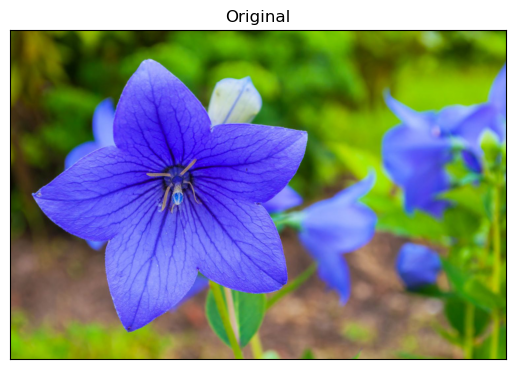

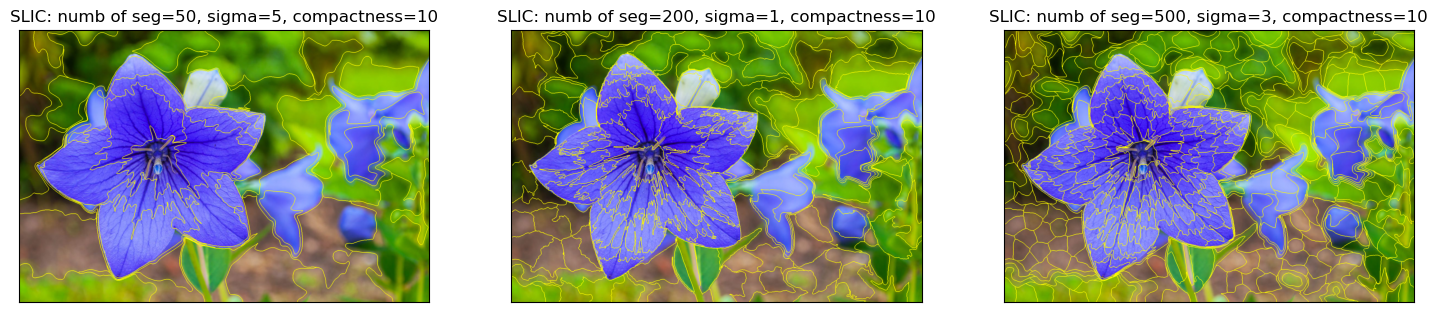

In [95]:
from skimage.segmentation import slic, mark_boundaries
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt

#your solution
img = io.imread('images/blue_flower.jpg')
blue_flower = img_as_float(img)
plt.title("Original")
plt.imshow(blue_flower) 
plt.xticks([])
plt.yticks([])

def SLIC_parameters(parameters,img):
    results = []
    for nseg, comp, sigma_value in parameters:
        temp = slic(blue_flowe, n_segments=nseg, compactness=comp, sigma=sigma_value, start_label=1)
        results.append((temp,len(np.unique(temp)),f"SLIC: numb of seg={nseg}, sigma={sigma_value}, compactness={comp}"))
    return results

def plot_results(results):
    fig=plt.figure(figsize=(18,10))
    for i in range(len(results)):
        fig.add_subplot(1,len(results),i+1)
        plt.title(results[i][2])
        plt.imshow(mark_boundaries(blue_flowe,results[i][0])) 
        plt.xticks([])
        plt.yticks([])

plot_results(SLIC_parameters([(50,10,5),(200,10,1),(500,10,3)],blue_flower))
#,(100,10,5)